<a href="https://colab.research.google.com/github/snvssk/data298A/blob/development/SatelliteImagery/MLModels/Resent50_RoofSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from keras.layers.core import Dense,Flatten
#from tensorflow.keras import layers,Dense,Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gZ889YZoIUvo6Bvc6lsU")
project = rf.workspace("sjsu").project("building-image")
dataset = project.version(13).download("coco")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 503 kB/s 
     |████████████████████████████████| 178 kB 8.2 MB/s 
     |████████████████████████████████| 138 kB 47.2 MB/s 
     |████████████████████████████████| 145 kB 10.4 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 67 kB 5.8 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=3e1385ac6ec055515a085e636b14aad4e01419cf5201663e32369560a5d96764
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: certifi
    Found existing installation: certif

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Building-Image-13 in coco:: 100%|██████████| 700/700 [00:00<00:00, 1629.28it/s]


In [3]:
import json
json_path= '/content/Building-Image-13/train/_annotations.coco.json'
file = open(json_path)
json_data= json.load(file)
#print(json_data)
categories = (json_data['categories'])
annotations= (json_data['annotations'])
image_paths = json_data['images']

In [4]:
print(categories)

[{'id': 0, 'name': 'Building-Roof', 'supercategory': 'none'}, {'id': 1, 'name': 'Building-Roof', 'supercategory': 'Building-Roof'}, {'id': 2, 'name': 'Commercial-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 3, 'name': 'Commercial-Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 4, 'name': 'Construction-Area', 'supercategory': 'Building-Roof'}, {'id': 5, 'name': 'Flat Roof', 'supercategory': 'Building-Roof'}, {'id': 6, 'name': 'Land', 'supercategory': 'Building-Roof'}, {'id': 7, 'name': 'Playground', 'supercategory': 'Building-Roof'}, {'id': 8, 'name': 'Slope-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 9, 'name': 'Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 10, 'name': 'Solar-Flat-Roof', 'supercategory': 'Building-Roof'}, {'id': 11, 'name': 'Solar-Pannel-Ground', 'supercategory': 'Building-Roof'}, {'id': 12, 'name': 'Solar-Slope-Roof', 'supercategory': 'Building-Roof'}, {'id': 13, 'name': 'TreeShading-Slope-Roof', 'supercategory': 'Building-Roof'}, {'

In [7]:
import os
base_train_path = '/content/Building-Image-13/train/'
category_map = {}
for category in categories:
  if category['supercategory']!= 'none':
    print(category)
    #os.mkdir(base_train_path + category['name'])
    category_map[category['id']] = category['name'] 

category_map

{'id': 1, 'name': 'Building-Roof', 'supercategory': 'Building-Roof'}
{'id': 2, 'name': 'Commercial-Flat-Roof', 'supercategory': 'Building-Roof'}
{'id': 3, 'name': 'Commercial-Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 4, 'name': 'Construction-Area', 'supercategory': 'Building-Roof'}
{'id': 5, 'name': 'Flat Roof', 'supercategory': 'Building-Roof'}
{'id': 6, 'name': 'Land', 'supercategory': 'Building-Roof'}
{'id': 7, 'name': 'Playground', 'supercategory': 'Building-Roof'}
{'id': 8, 'name': 'Slope-Flat-Roof', 'supercategory': 'Building-Roof'}
{'id': 9, 'name': 'Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 10, 'name': 'Solar-Flat-Roof', 'supercategory': 'Building-Roof'}
{'id': 11, 'name': 'Solar-Pannel-Ground', 'supercategory': 'Building-Roof'}
{'id': 12, 'name': 'Solar-Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 13, 'name': 'TreeShading-Slope-Roof', 'supercategory': 'Building-Roof'}
{'id': 14, 'name': 'Unknownshape-Roof', 'supercategory': 'Building-Roof'}


{1: 'Building-Roof',
 2: 'Commercial-Flat-Roof',
 3: 'Commercial-Slope-Roof',
 4: 'Construction-Area',
 5: 'Flat Roof',
 6: 'Land',
 7: 'Playground',
 8: 'Slope-Flat-Roof',
 9: 'Slope-Roof',
 10: 'Solar-Flat-Roof',
 11: 'Solar-Pannel-Ground',
 12: 'Solar-Slope-Roof',
 13: 'TreeShading-Slope-Roof',
 14: 'Unknownshape-Roof'}

In [8]:
image_id_map = {}
for image_path in image_paths:
  #print(image_path)
  image_id_map[image_path['id']] = image_path['file_name']
#print(image_id_map)


for images in annotations:
  #print(images)
  source_path = base_train_path + image_id_map[images['id']]
  destination_path = base_train_path + category_map[images['category_id']]+"/" + image_id_map[images['id']]
  #print(source_path)
  #print(destination_path)
  os.rename(source_path, destination_path)

In [9]:
data_dir= '/content/Building-Image-13/train'
print(data_dir)

!rm -rf '/content/Building-Image-13/train/.ipynb_checkpoints'

/content/Building-Image-13/train


In [10]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 695 files belonging to 14 classes.
Using 556 files for training.


In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 695 files belonging to 14 classes.
Using 139 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['Building-Roof', 'Commercial-Flat-Roof', 'Commercial-Slope-Roof', 'Construction-Area', 'Flat Roof', 'Land', 'Playground', 'Slope-Flat-Roof', 'Slope-Roof', 'Solar-Flat-Roof', 'Solar-Pannel-Ground', 'Solar-Slope-Roof', 'TreeShading-Slope-Roof', 'Unknownshape-Roof']


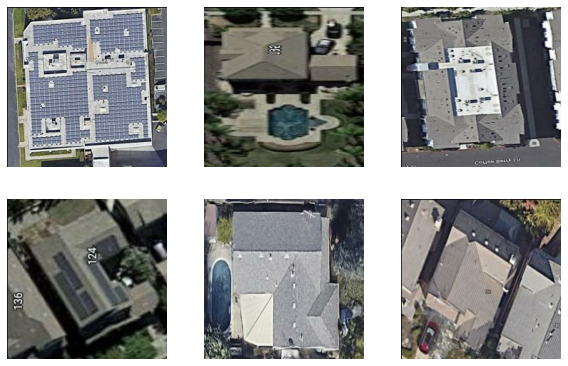

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  #print(labels)
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    #print(labels[0:1])
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=14,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

94765736/94765736 [==============================] - 1s 0us/step


In [15]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(14, activation='softmax'))

In [16]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 14)                7182      
                                                                 
Total params: 24,643,982
Trainable params: 1,056,270
Non-trainable params: 23,587,712
_________________________________________________________________


In [17]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['Precision'])




In [18]:
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
18/18 [==============================] - 119s 6s/step - loss: 2.2978 - precision: 0.4574 - val_loss: 1.9330 - val_precision: 0.5196
Epoch 2/10
18/18 [==============================] - 113s 6s/step - loss: 1.4254 - precision: 0.6457 - val_loss: 1.8255 - val_precision: 0.5464
Epoch 3/10
18/18 [==============================] - 114s 6s/step - loss: 1.2206 - precision: 0.6820 - val_loss: 1.8359 - val_precision: 0.5269
Epoch 4/10
18/18 [==============================] - 112s 6s/step - loss: 1.0220 - precision: 0.7242 - val_loss: 2.0560 - val_precision: 0.3636
Epoch 5/10
18/18 [==============================] - 114s 6s/step - loss: 0.8608 - precision: 0.7935 - val_loss: 2.0298 - val_precision: 0.5385
Epoch 6/10
18/18 [==============================] - 114s 6s/step - loss: 0.6816 - precision: 0.8578 - val_loss: 2.0759 - val_precision: 0.5278
Epoch 7/10
18/18 [==============================] - 114s 6s/step - loss: 0.5534 - precision: 0.8944 - val_loss: 2.2079 - val_precision: 0.4653

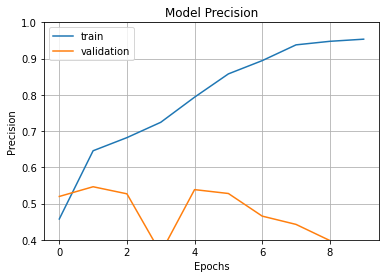

In [20]:
fig1 = plt.gcf()
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


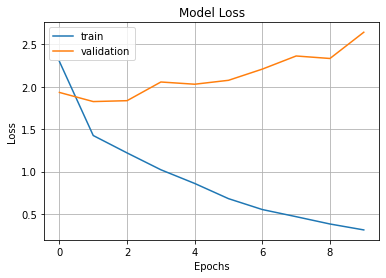

In [21]:
#fig2 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [22]:
import cv2
def predictor(predict_img):
  image=cv2.imread(str(predict_img))
  image_resized= cv2.resize(image, (img_height,img_width))
  image=np.expand_dims(image_resized,axis=0)
  PIL.Image.open(str(predict_img))
  pred=resnet_model.predict(image)
  output_class=class_names[np.argmax(pred)]
  print("The predicted class is", output_class) 
  return True
  

1/1 [==============================] - 1s 1s/step
The predicted class is Solar-Slope-Roof


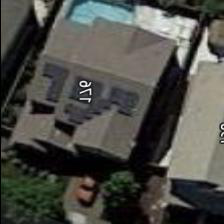

In [23]:
#print(list(data_dir.glob()))
import os

folder_path = data_dir+'/Commercial-Flat-Roof/'
commercial_flat_roof = os.listdir(folder_path)
#print(commercial_flat_roof)

predictor(folder_path+commercial_flat_roof[1])
PIL.Image.open(str(folder_path+commercial_flat_roof[1]))



1/1 [==============================] - 0s 214ms/step
The predicted class is Solar-Slope-Roof


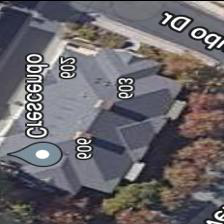

In [24]:
folder_path = data_dir+'/Solar-Slope-Roof/'
solar_slope_roof = os.listdir(folder_path)
#print(solar_slope_roof)

predictor(folder_path+solar_slope_roof[1])
PIL.Image.open(str(folder_path+solar_slope_roof[1]))